# Explore here

In [165]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np




ds=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv',sep=';')
ds


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [166]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

El dataset no tiene campos vacíos

Columnas sin valor predictivo:
    contanct,month,day_of_week,duration,campaing,pdays,previous.

In [167]:
ds.shape

(41188, 21)

In [168]:
ds.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [169]:
ds.drop_duplicates(inplace=True)
ds.shape

(41176, 21)

Debido a que la columna job tiene un total de 12 posibles resultados se codificará en base a la frecuencia de aparicion de cada resultado para evitar crear más columas con la función de pandas para obtener los dummies. Se hará lo mismo con la columna education.

Las columnas categoricas con valores unknown voy a imputarlos por la moda de la misma columna.

In [170]:
columns_with_unknown = [col for col in ds.columns if (ds[col] == 'unknown').any()]

print("Columnas con 'unknown':")
print(columns_with_unknown)

Columnas con 'unknown':
['job', 'marital', 'education', 'default', 'housing', 'loan']


In [171]:
columnasModa=['job', 'marital', 'education', 'default', 'housing', 'loan']
for col in columnasModa:
    moda=ds[col].mode()[0]
    ds[col] = ds[col].replace('unknown', moda)


ds=pd.get_dummies(ds,columns=['marital','default','housing','loan','poutcome'])

columnas=['job','education']
for col in columnas:
    frecuencia=ds[col].value_counts()
    ds[col+'FrenEncoder']=ds[col].map(frecuencia)
ds


,age,job,education,contact,month,day_of_week,duration,campaign,pdays,previous,...,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success,jobFrenEncoder,educationFrenEncoder
0,56,housemaid,basic.4y,telephone,may,mon,261,1,999,0,...,False,True,False,True,False,False,True,False,1060,4176
1,57,services,high.school,telephone,may,mon,149,1,999,0,...,False,True,False,True,False,False,True,False,3967,9512
2,37,services,high.school,telephone,may,mon,226,1,999,0,...,False,False,True,True,False,False,True,False,3967,9512
3,40,admin.,basic.6y,telephone,may,mon,151,1,999,0,...,False,True,False,True,False,False,True,False,10749,2291
4,56,services,high.school,telephone,may,mon,307,1,999,0,...,False,True,False,False,True,False,True,False,3967,9512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,professional.course,cellular,nov,fri,334,1,999,0,...,False,False,True,True,False,False,True,False,1718,5240
41184,46,blue-collar,professional.course,cellular,nov,fri,383,1,999,0,...,False,True,False,True,False,False,True,False,9253,5240
41185,56,retired,university.degree,cellular,nov,fri,189,2,999,0,...,False,False,True,True,False,False,True,False,1718,13894
41186,44,technician,professional.course,cellular,nov,fri,442,1,999,0,...,False,True,False,True,False,False,True,False,6739,5240


In [172]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.023800,10.420680,17.000,32.000,38.000,47.000,98.000
duration,41176.0,258.315815,259.305321,0.000,102.000,180.000,319.000,4918.000
campaign,41176.0,2.567879,2.770318,1.000,1.000,2.000,3.000,56.000
pdays,41176.0,962.464810,186.937102,0.000,999.000,999.000,999.000,999.000
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41176.0,0.081922,1.570883,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41176.0,93.575720,0.578839,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41176.0,-40.502863,4.627860,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41176.0,3.621293,1.734437,0.634,1.344,4.857,4.961,5.045
nr.employed,41176.0,5167.034870,72.251364,4963.600,5099.100,5191.000,5228.100,5228.100


Elimnaré las columnas dummies que no sean necesarias ya que al tener 2 ya es suficiente para saber el valor de la tercera.

Transformación de la variable objetivo a una variable binaria

In [173]:
ds.drop(columns=['contact','month','day_of_week','duration','campaign','pdays','previous','job','education','marital_single','poutcome_nonexistent'],inplace=True)
ds['y'] = ds['y'].map({'yes': 1, 'no': 0})

ds

,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,marital_divorced,marital_married,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_success,jobFrenEncoder,educationFrenEncoder
0,56,1.1,93.994,-36.4,4.857,5191.0,0,False,True,True,False,True,False,True,False,False,False,1060,4176
1,57,1.1,93.994,-36.4,4.857,5191.0,0,False,True,True,False,True,False,True,False,False,False,3967,9512
2,37,1.1,93.994,-36.4,4.857,5191.0,0,False,True,True,False,False,True,True,False,False,False,3967,9512
3,40,1.1,93.994,-36.4,4.857,5191.0,0,False,True,True,False,True,False,True,False,False,False,10749,2291
4,56,1.1,93.994,-36.4,4.857,5191.0,0,False,True,True,False,True,False,False,True,False,False,3967,9512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,-1.1,94.767,-50.8,1.028,4963.6,1,False,True,True,False,False,True,True,False,False,False,1718,5240
41184,46,-1.1,94.767,-50.8,1.028,4963.6,0,False,True,True,False,True,False,True,False,False,False,9253,5240
41185,56,-1.1,94.767,-50.8,1.028,4963.6,0,False,True,True,False,False,True,True,False,False,False,1718,13894
41186,44,-1.1,94.767,-50.8,1.028,4963.6,1,False,True,True,False,True,False,True,False,False,False,6739,5240


In [174]:
X=ds.drop(['y'],axis=1)
y=ds['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train, y_train)
dsimp = pd.DataFrame({'Feature':X_train.columns, 'Importance':xgb_model.feature_importances_*100})
dsimp = dsimp.sort_values(by='Importance', ascending=False)
dsimp

,Feature,Importance
5,nr.employed,73.573265
15,poutcome_success,7.675608
3,cons.conf.idx,3.499389
2,cons.price.idx,1.818271
4,euribor3m,1.648110
7,marital_married,1.551002
17,educationFrenEncoder,1.441440
0,age,1.388368
16,jobFrenEncoder,1.333990
6,marital_divorced,1.281148


In [175]:
X_train=X_train[dsimp[dsimp.Importance>=1].Feature.values]
X_test=X_test[dsimp[dsimp.Importance>=1].Feature.values]


In [176]:
vif = pd.Series([variance_inflation_factor(X_train.corr().values, i) for i in range(X_train.corr().shape[1])], index=X_train.columns)
vif

nr.employed              7447.700731
poutcome_success            2.633996
cons.conf.idx             165.892186
cons.price.idx            596.553923
euribor3m               21720.457995
marital_married             4.191484
educationFrenEncoder        1.256652
age                         2.463209
jobFrenEncoder              1.434274
marital_divorced            3.448222
emp.var.rate             6296.372918
housing_no                  1.117984
poutcome_failure            2.612344
loan_no                     1.008849
dtype: float64

In [177]:
X_corr = X_train.copy()
X_corr['y'] = y_train
corr = X_corr.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=3)

,nr.employed,poutcome_success,cons.conf.idx,cons.price.idx,euribor3m,marital_married,educationFrenEncoder,age,jobFrenEncoder,marital_divorced,emp.var.rate,housing_no,poutcome_failure,loan_no,y
nr.employed,1.000,-0.354,0.101,0.520,0.945,0.084,-0.053,-0.017,0.071,0.021,0.906,0.046,-0.347,-0.006,-0.356
poutcome_success,-0.354,1.000,0.089,-0.074,-0.282,-0.031,0.042,0.037,-0.040,-0.010,-0.257,-0.015,-0.063,-0.001,0.316
cons.conf.idx,0.101,0.089,1.000,0.062,0.279,0.060,0.065,0.124,-0.028,-0.016,0.198,0.034,-0.160,0.012,0.059
cons.price.idx,0.520,-0.074,0.062,1.000,0.686,0.047,-0.080,0.002,0.026,0.018,0.774,0.081,-0.297,0.004,-0.135
euribor3m,0.945,-0.282,0.279,0.686,1.000,0.089,-0.048,0.011,0.054,0.020,0.972,0.061,-0.383,-0.002,-0.308
marital_married,0.084,-0.031,0.060,0.047,0.089,1.000,-0.151,0.269,-0.037,-0.442,0.081,0.012,-0.032,-0.004,-0.047
educationFrenEncoder,-0.053,0.042,0.065,-0.080,-0.048,-0.151,1.000,-0.110,0.012,0.008,-0.056,-0.011,0.014,-0.004,0.057
age,-0.017,0.037,0.124,0.002,0.011,0.269,-0.110,1.000,-0.162,0.168,-0.000,0.001,-0.006,0.005,0.033
jobFrenEncoder,0.071,-0.040,-0.028,0.026,0.054,-0.037,0.012,-0.162,1.000,-0.028,0.063,-0.001,-0.017,-0.015,-0.045
marital_divorced,0.021,-0.010,-0.016,0.018,0.020,-0.442,0.008,0.168,-0.028,1.000,0.019,0.000,0.008,0.004,-0.008


No hay una variable que sea altamente representativa

In [178]:
binarycols = X_train[(X_train==0)|(X_train==1)].dropna(axis=1).columns.values
binarycols

array(['poutcome_success', 'marital_married', 'marital_divorced',
       'housing_no', 'poutcome_failure', 'loan_no'], dtype=object)

In [179]:
X_train.drop(binarycols, axis=1).skew()

nr.employed            -1.047443
cons.conf.idx           0.309427
cons.price.idx         -0.223254
euribor3m              -0.709227
educationFrenEncoder    0.018469
age                     0.789495
jobFrenEncoder         -0.401061
emp.var.rate           -0.724056
dtype: float64

In [180]:
X_train_num = X_train.drop(binarycols, axis=1)
X_test_num = X_test.drop(binarycols, axis=1)

scaler = MinMaxScaler().fit(X_train_num)
X_train_num_sc = scaler.transform(X_train_num)
X_test_num_sc = scaler.transform(X_test_num)

In [181]:
X_train_sc = pd.concat([pd.DataFrame(X_train_num_sc, columns=X_train_num.columns), X_train[binarycols].reset_index(drop=True)], axis=1)
X_test_sc = pd.concat([pd.DataFrame(X_test_num_sc, columns=X_test_num.columns), X_test[binarycols].reset_index(drop=True)], axis=1)
X_train_sc.columns

Index(['nr.employed', 'cons.conf.idx', 'cons.price.idx', 'euribor3m',
       'educationFrenEncoder', 'age', 'jobFrenEncoder', 'emp.var.rate',
       'poutcome_success', 'marital_married', 'marital_divorced', 'housing_no',
       'poutcome_failure', 'loan_no'],
      dtype='object')

In [182]:
model = LogisticRegression()
model.fit(X_train_sc, y_train)

LogisticRegression()

In [183]:
y_pred = model.predict(X_test_sc)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [184]:
accuracy_score(y_test, y_pred)


0.8933948518698397

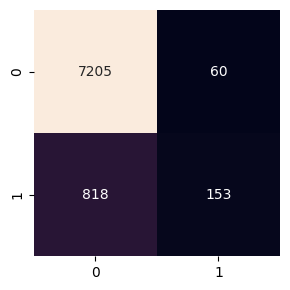

In [185]:
prestamo = confusion_matrix(y_test, y_pred)

cmds = pd.DataFrame(prestamo)

plt.figure(figsize = (3, 3))
sns.heatmap(cmds, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

Búsqueda de hiperparámetros

In [186]:

estimator = ExtraTreesClassifier()

hiperparam = {'n_estimators':np.arange(10,100,10), 'max_depth':np.arange(10,100,10)}

random_search = RandomizedSearchCV(estimator, param_distributions = hiperparam, n_iter=5, cv=5, random_state=42, n_jobs=-1, scoring='accuracy', verbose=2)
random_search.fit(X_train_sc, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[CV] END ......................max_depth=40, n_estimators=40; total time=   1.0s
[CV] END ......................max_depth=40, n_estimators=40; total time=   1.1s
[CV] END ......................max_depth=40, n_estimators=40; total time=   1.0s
[CV] END ......................max_depth=40, n_estimators=40; total time=   1.0s
[CV] END ......................max_depth=10, n_estimators=10; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=10; total time=   0.2s
[CV] END ......................max_depth=10, n_estimators=10; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=10; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=10; total time=   0.1s
[CV] END ......................max_depth=40, n_estimators=40; total time=   1.0s
[CV] END ......................max_depth=30, n_estimators=50; total time=   1.2s
[CV] END ......................max_depth=30, n_estimators=50; total time=   1.1s
[CV] END ...................

RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   random_state=42, scoring='accuracy', verbose=2)

In [187]:
random_search.best_estimator_

ExtraTreesClassifier(max_depth=np.int64(10), n_estimators=np.int64(10))

In [188]:
random_search.best_params_

{'n_estimators': np.int64(10), 'max_depth': np.int64(10)}

In [189]:
random_search.best_score_

np.float64(0.8998482088646023)

In [190]:
random_search.cv_results_

{'mean_fit_time': array([0.92989206, 0.1230669 , 1.03308864, 1.07500434, 0.24258485]),
 'std_fit_time': array([0.03487741, 0.02228425, 0.07344325, 0.08824946, 0.01540589]),
 'mean_score_time': array([0.06409554, 0.00790358, 0.08463616, 0.09869456, 0.02124305]),
 'std_score_time': array([0.00243102, 0.00022298, 0.01651831, 0.04161666, 0.00765614]),
 'param_n_estimators': masked_array(data=[40, 10, 50, 50, 10],
              mask=[False, False, False, False, False],
        fill_value=999999),
 'param_max_depth': masked_array(data=[40, 10, 30, 40, 30],
              mask=[False, False, False, False, False],
        fill_value=999999),
 'params': [{'n_estimators': np.int64(40), 'max_depth': np.int64(40)},
  {'n_estimators': np.int64(10), 'max_depth': np.int64(10)},
  {'n_estimators': np.int64(50), 'max_depth': np.int64(30)},
  {'n_estimators': np.int64(50), 'max_depth': np.int64(40)},
  {'n_estimators': np.int64(10), 'max_depth': np.int64(30)}],
 'split0_test_score': array([0.87856709, 0.

In [191]:
hp_grid = {'n_estimators':[10,20,30,40,50], 'max_depth':[10, 20, 30,40,50]}

grid_search = GridSearchCV(estimator, param_grid=hp_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=3)

grid_search.fit(X_train_sc, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 2/5] END .....max_depth=10, n_estimators=10;, score=0.901 total time=   0.2s
[CV 1/5] END .....max_depth=10, n_estimators=10;, score=0.901 total time=   0.2s
[CV 3/5] END .....max_depth=10, n_estimators=10;, score=0.900 total time=   0.1s
[CV 4/5] END .....max_depth=10, n_estimators=10;, score=0.900 total time=   0.1s
[CV 5/5] END .....max_depth=10, n_estimators=10;, score=0.898 total time=   0.2s
[CV 1/5] END .....max_depth=10, n_estimators=20;, score=0.902 total time=   0.3s
[CV 2/5] END .....max_depth=10, n_estimators=20;, score=0.901 total time=   0.2s
[CV 3/5] END .....max_depth=10, n_estimators=20;, score=0.898 total time=   0.2s
[CV 4/5] END .....max_depth=10, n_estimators=20;, score=0.900 total time=   0.2s
[CV 5/5] END .....max_depth=10, n_estimators=20;, score=0.900 total time=   0.3s
[CV 1/5] END .....max_depth=10, n_estimators=30;, score=0.901 total time=   0.4s
[CV 2/5] END .....max_depth=10, n_estimators=30

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='accuracy', verbose=3)

In [192]:
grid_search.best_params_

{'max_depth': 10, 'n_estimators': 40}

In [193]:

def calculate_classification_metrics(y_train, y_test, y_pred_train, y_pred_test, y_pred_train_proba, y_pred_test_proba):
    # Calcular las métricas para entrenamiento
    accuracy_train = accuracy_score(y_train, y_pred_train)
    precision_train = precision_score(y_train, y_pred_train)
    recall_train = recall_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train)
    roc_auc_train = roc_auc_score(y_train, y_pred_train_proba) 

    # Calcular las métricas para test
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)
    roc_auc_test = roc_auc_score(y_test, y_pred_test_proba) 

    # Calcular las diferencias
    accuracy_diff = accuracy_test - accuracy_train
    precision_diff = precision_test - precision_train
    recall_diff = recall_test - recall_train
    f1_diff = f1_test - f1_train
    roc_auc_diff = roc_auc_test - roc_auc_train

    # Crear el DataFrame
    metrics_df = pd.DataFrame({
        'Accuracy': [accuracy_train, accuracy_test, accuracy_diff],
        'Precision': [precision_train, precision_test, precision_diff],
        'Recall': [recall_train, recall_test, recall_diff],
        'F1 Score': [f1_train, f1_test, f1_diff],
        'ROC AUC': [roc_auc_train, roc_auc_test, roc_auc_diff]
    }, index=['Train', 'Test', 'Difference'])

    return metrics_df


In [194]:
y_pred_train_proba = grid_search.best_estimator_.predict_proba(X_train_sc)[:, 1]  
y_pred_test_proba = grid_search.best_estimator_.predict_proba(X_test_sc)[:, 1]
y_pred_train = grid_search.best_estimator_.predict(X_train_sc)
y_pred_test = grid_search.best_estimator_.predict(X_test_sc)

In [195]:
metrics_df = calculate_classification_metrics(y_train, y_test, y_pred_train, y_pred_test, y_pred_train_proba, y_pred_test_proba)
metrics_df

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Train,0.911536,0.832451,0.257361,0.393170,0.843143
Test,0.892909,0.673152,0.178167,0.281759,0.789403
Difference,-0.018627,-0.159300,-0.079194,-0.111411,-0.053740


In [196]:
model_bagging = BaggingClassifier(grid_search.best_estimator_, n_estimators=15, random_state=42).fit(X_train_sc, y_train)

In [197]:
y_pred_train_bag=model_bagging.predict(X_train_sc)
y_pred_test_bag=model_bagging.predict(X_test_sc)
y_pred_train_bag_proba=model_bagging.predict_proba(X_train_sc)[:,1]
y_pred_test_bag_proba=model_bagging.predict_proba(X_test_sc)[:,1]

In [198]:
calculate_classification_metrics(y_train, y_test, y_pred_train_bag, y_pred_test_bag, y_pred_train_bag_proba, y_pred_test_bag_proba)

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Train,0.910443,0.818828,0.251363,0.384647,0.842641
Test,0.893395,0.686747,0.176107,0.280328,0.789102
Difference,-0.017048,-0.132081,-0.075256,-0.104320,-0.053540
